# PNI Math Tools 2017 -- Programming module -- Day 2
9/19/17


### Items to be covered

1. Using Jupyter Notebooks/Recap from last time
2. Debugging
3. Encapsulation/mutation
4. General Programming tips
5. FOR loops
6. Default Parameter Values
7. List comprehensions
8. Modules
9. Packages
10. Plotting

    


## Using Jupyter Notebooks:

Notebooks allow you to mix text, graphics, and executable code within a single file that can be easily shared. Each notebook is a file (ending in .ipynb) that you open in your browser. Notebooks are composed of chunks called "cells", each of which can be code, or can be text. When you add a new cell, the typical default is that it will be a "code" cell. To make it a text cell, choose "markdown." Running (i.e., executing) a code cell sends its contents to an underlying Python "kernel", which treats it just as if you had typed the contents into a Python console.

To run a code cell and advance to the next cell, press `Shift + Return`. 

To run a cell without advancing to the next cell, press `Control + Return` 

You can find a variety of shortcuts at **Keyboard Shortcuts** in the Help menu above

**If you're confused:** Google and Python are the best of friends! Throw a few words describing your problem into Google and click on the first Stack Overflow link — this will solve 95% of your problems!

If you would simply like to know more about a particular function, press `Shift + Tab` while inside the function to bring up a snippet of documentation; press `Tab` again (while still holding `Shift`) to bring up an even larger box of documentation; a third press of `Tab` will turn the bottom half of your screen into a window with the full documentation for your function (including definitions of the function's inputs, outputs, parameters and their default settings, and often some example code!)## (from yesterday, for reference): using Jupyter Notebooks:

---

### example: let's add a new cell and make a function

In [1]:
def f(x):
    y = 2*x
    y = y+1
    return y

In [2]:
f(30)


61

Stepping through what Python does when a function is called:
1. Python takes whatever is in the parenthesis of the calling statement and runs that code first, until it evaluates to something (e.g., a number)
2. Then it opens a new (almost) private namespace for inside the function, and assigns the results of the evaluation to variables with the names of the parameters in the definition of the function
3. Then it runs the code inside the function
4. If there is a "return" statement, it returns some values that can be used outside the function. A function with a single output evaluates to that output, just like 2\*3 evaluates to 6.
 

In [ ]:
y = 4
print(f(y))
print(f(f(y)))
print(f(f(f(y))))
print("Meanwhile, y is = ", y)

### The Debugger

The debugger can be useful, letting you step through each line of code, examining the results after each line.

Within-debugger commands include

    n    execute current line, move to next line
    s    step into a function if there is one in the current line
    r    continue executing the current function, not stopping until it returns
    c    continue without stopping
and importantly

    h    for help

In [2]:
%%debug
x = 10
print(f(3))
print(f(90))

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(2)<module>()

ipdb> n
> <string>(3)<module>()

ipdb> n
7
> <string>(4)<module>()

ipdb> s
--Call--
> <ipython-input-1-0cad61c4097e>(1)f()
----> 1 def f(x):
      2     y = 2*x
      3     y = y+1
      4     return y

ipdb> n
> <ipython-input-1-0cad61c4097e>(2)f()
      1 def f(x):
----> 2     y = 2*x
      3     y = y+1
      4     return y

ipdb> n
> <ipython-input-1-0cad61c4097e>(3)f()
      1 def f(x):
      2     y = 2*x
----> 3     y = y+1
      4     return y

ipdb> c
181


Functions can have more than one input/output, or even no inputs and outputs.

In [3]:
def f(x, y):
    return x + y, x - y

total, diff = f(10, 5)
print(total, diff)
    

def g():
    print("\nHelp, I'm trapped in a function!")
    
g()

15 5

Help, I'm trapped in a function!


### Clarification from last time. 'is' and '=='

'is' is NOT the same as '=='

In [4]:
this = 2
that = 2.0
print(this == that)

True


In [5]:
print(this is that)

False


---

# Encapsulation

A basic principle of clean coding is splitting big problems into cleanly separable smaller chunks, each of which is easier to solve. To do this, you want to make each chunk as independent of the others as possible, so you can debug it and/or modify it without worrying about how it would affect other chunks (or how changing other chunks would affect it). When many pieces of code depend on many other pieces, it becomes what is known as "spaghetti code", a.k.a. a mess.

### using functions to wrap and seal off chunks of code

In **functional programming**, the fact that functions create their own variable namespaces is used to cleanly wrap different chunks of code apart from each other. That is, a variable first declared and used inside a function can be addressed and used only inside the function. It is therefore kept totally separate from some other chunk of code because it can't be used or modified outside the function, even accidentally.

Some languages enforce such encapsulation pretty strictly: the namespace inside a function is totally separate from that outside. That is, when executing code inside the function you can't access *any* variables that existed outside the function, you only know what was passed as parameters to the function; and *none* of the variables from inside the function are accessible once outside it, values have to be passed to the outside as outputs returned by the function. So communication is strictly controlled: in through known parameters, out through known outputs of the function.

**Python is not like that: encapsulation is not strict.** Which means that you can cut some corners: you can write code that is a little shorter and faster than you could otherwise, but you can also much more easily screw up and write bad code that is a mess to debug. So **be careful**! My recommendation is, that to start you try to write code *that works*. That means write it clean and well-encapsulated. Once you've debugged it, and it all works as you thought it would, then maybe you can try cutting some corners for efficiency.

Two big holes are:

### hole #1: values of variables defined outside the function can be used inside the function.

In [6]:
a = 3

def f(x):
    return a*x

print("f(2)=", f(2), "; a=", a)

a = 10
print("f(2)=", f(2), "; a=", a)

# But note that although you can read a's value inside the function, you can't modify a

# def f(x):
#     a = a + 3
#     return a*x

# print("f(2)=", f(2))


f(2)= 6 ; a= 3
f(2)= 20 ; a= 10


It **does not** work the other way around -- variables defined inside the function are not available outside of it.

In [7]:
def f(x):
    b = 3
    return b*x

print(f(2))
print(b)

6


NameError: name 'b' is not defined

### hole #2: mutating a variable passed as a parameter *does* change the variable outside the function

Certain operations change the value of a variable in place; we say that these operations "mutate" the variable.

In [8]:
a = [0, 1]

print(a)
b = a + [2]
print(a)

[0, 1]
[0, 1]


In [9]:
print(a)
a += [2] # "mutation" here
print(a)

[0, 1]
[0, 1, 2]


Usually, when you pass a variable to a function, the function cannot change the value argument outside of the function.

In [10]:
def f(x):
    x = [0, 1, 2] # reassignment of x, does not persist after function ends
    return x

a = [0, 1]
print(a)
print(f(a))
print(a)

[0, 1]
[0, 1, 2]
[0, 1]


But be careful if you mutate the variable inside of the function!

In [11]:
def f(x):
    x += [2] # mutation of x, DOES persist after function ends
    return x

a = [0, 1]
print(a)
print(f(a))
print(a)

[0, 1]
[0, 1, 2]
[0, 1, 2]


### You can also mutate strings

In [12]:
 s = "this is my string"
# turn it into a list
slist = list(s)
print("sl = ", slist)

sl =  ['t', 'h', 'i', 's', ' ', 'i', 's', ' ', 'm', 'y', ' ', 's', 't', 'r', 'i', 'n', 'g']


In [13]:
s.split('s')

['thi', ' i', ' my ', 'tring']

In [14]:
a = [0, 1]

print(a)
b = a + [2]
print(a)

[0, 1]
[0, 1]


In [15]:
print(slist)
s2 = "".join(slist)
print("s2 = ", s2)

"{:.02f}".format(0.12345)

['t', 'h', 'i', 's', ' ', 'i', 's', ' ', 'm', 'y', ' ', 's', 't', 'r', 'i', 'n', 'g']
s2 =  this is my string


'0.12'

In [16]:
print(a)
a += [2] # "mutation" here
print(a)

[0, 1]
[0, 1, 2]


In [17]:
s3 = "-- ".join(slist)
print("s3 = ", s3)

s3 =  t-- h-- i-- s--  -- i-- s--  -- m-- y--  -- s-- t-- r-- i-- n-- g


Usually, when you pass a variable to a function, the function cannot change the value argument outside of the function.

## Programming recommendations:


1. Within a function, never access values of variables declared outside it. Only use the parameters that are explicitly passed in.  That way, no matter how big and complex your function gets, you'll never get confused as to what it depends on for it to run the way you think it will.
2. Never mutate parameters passed to a function. That way you'll never get tripped up by a variable unexpectedly changing value without you noticing, because you forgot that you were mutating it inside a function you called.


Also:

1. Document your function properly, so that the effects of the function are fully described by what is in there, and only use what is described there. That way, you can change the inside of the function (debug, make more efficient, implement however you want), and as long as it still matches the documentation, none of your other code should be affected in any way: you will have successfully *encapuslated* the code inside the function. "Proper" documentation means:
    1. Describe what the function does
    2. List out all the parameters to the function, and what format those should be in (e.g., if a parameters needs to be an integer, then say so; etc.)
    3. List out all the outputs of the function, and what format those take.
    4. The function is then defined by the (parameter input)->(output results) transformation. As long as that stays constant, you can rewrite the function any way you want and none of your other code will break. (Note that some functions, like those that print something to the screen, or functions that produce some graphics, like the turtle graphics we've been using, have an effect that isn't part of the value the function returns.)
    
2. A good rule of thumb for coding is to keep your code DRY, i.e. Don't Repeat Yourself. Keep your code as minimal as 


---

* In-class exercise: write an `xor()` function


In [ ]:
#goal is to take in two boolean values, return True only when the inputs differ.

def xor(x,y):
    if not x and not y:
        return False
    elif not x and y:
        return True
    elif x and not y:
        return True
    elif x and y:
        return False
    
    
# WRONG!!!!    
def xor2(x, y):
    z = x or y
    w = x and y
    if w:
        return False
    else:
        return True
    
def xor3(x, y):
    if x==y:
        return False
    else:
        return True
    
    
def xor4(x, y):
    return not(x==y)
    # to help figure out what the above line does, break into easier to
    # understand components:
    # z = (x==y)
    # z2 = not z

print(xor4(False, False))
print(xor4(False, True))
print(xor4(True, False))
print(xor4(True, True))

---
# FOR loops

In [ ]:
mylist = [1, True, "hello", 3+2j]

for x in mylist:
    print(x)

One useful function often used with FOR loops is 

    range([start], stop, [stepsize])  # the parameters inside the square brackets are optional; 
                                      # their default values are start=0, stepsize=1
    
which returns a "range" object that FOR loops can iterate over. For the purpose of FOR loops, you can terat it as if it were a list. Let's cast some ranges into lists to see what they look like.
    

In [18]:
print(list(range(2, 50, 10)))

#equivalent code:
for x in [5, 10, 15, 20, 25]:
    print(x)
    
for x in range(5, 30, 5):
    print(x)
    

[2, 12, 22, 32, 42]
5
10
15
20
25
5
10
15
20
25


In [ ]:
print(list(range(5)))
print(list(range(2,5)))
print(list(range(-3)))
print(list(range(2, 5, 0.25)))

In [ ]:
for x in range(0, 9, 1):
    print(x)

In-class example: dounting down by 2s, but now using for loops and range()

In [ ]:
print(list(range(10, 0, -2)))

for x in range(10, 0, -2):
    print("here is my current item: ", x)

In [ ]:
for x in [1, 3, 5, 'doop-de-doo']:
    print(x)
    print('looping...')

In [ ]:
for x in range(2, 5):
    print(x)
    print('looping...')
    
print(x)

Example: computing the mean of a all even numbers between 2 and 10 (inclusive)

In [83]:
print(list(range(2, 12, 2)))

[2, 4, 6, 8, 10]


In [82]:
total = 0 # caclulate sum of even numbers

for x in range(2, 12, 2):
    total = total + x
print("total = ", total)

n = (12 - 2)/2 # calculate count of even numbers

print(total/n) # calculate the average

total =  30
6.0


It's a good idea to  assign all values that you use to a variable to make it easier to edit/resuse your code.

**Note: the code below has a bug!** In-class exercise: turn it into a function, and fix it.

In [84]:
start = 2
stop = 19
step = 3

total = 0

for x in range(start, stop, step):
    total = total + x
    
n = (stop - start)/step
    
print(list(range(start, stop, step)))
print(1.0*total/n)

[2, 5, 8, 11, 14, 17]
10.058823529411764


In [87]:
def myavg(start, stop, step=1):
    total = 0
    counter = 0

    for x in range(start, stop, step):
        total = total + x
        counter = counter + 1
        
    return total/counter

print("result = ", myavg(2, 19, 3))
print("result 2 = ", myavg(2, 19, step=2))

result =  9.5
result 2 =  10.0


In [89]:
print(list(range(2,19,3)))
print(list(range(2,19,2)))

[2, 5, 8, 11, 14, 17]
[2, 4, 6, 8, 10, 12, 14, 16, 18]


---

# Functions (continued): default parameter values in functions

Some parameters will have a reasonable default value. Python let's you set this, so that someone using the function does not need to specify its value, but can override the default if they wish.

In [91]:
def f(x, a=2, verbose=True):
    x_sq = x**2
    if verbose:
        print("x_sq:", x_sq)
    return a*x_sq

In [20]:
# print(f(3)) # will assume default values of a=2, verbose=False
print(f(3, verbose=True, a=3))

print(f(3, a=3, verbose=True))

print(f(3, a=3, verbose=False))


x_sq: 9
27
x_sq: 9
27
27


In [21]:
print(f(3, a=4))    # will override default value of a, verbose still assumed to be False
print(f(3, 10))     # will set the second parameter, a, to 10
print(f(3,10,True)) # will set second parameter,a, to 10 and third parameter, verbose, to True
print(f(3,verbose=True,a=10)) # can rearrange order of optional parameters if explicitly stated

x_sq: 9
36
x_sq: 9
90
x_sq: 9
90
x_sq: 9
90


# List comprehensions

    [evaluateable-expression    for variable in iterable (e.g., a list)   [optional: if boolean condition]]
    
For those of you with a `Matlab` background, list comprehensions largely replace the `find()` function

In [70]:
# This cell is an example of what will be done more efficiently
# with list comprehensions below

# squaring a list of even numbers:

# put them all in a list
mylist = []
for x in range(0, 10):
    if x%2==0:   # if x is even
        mylist += [x**2]
    
print(mylist)    

[0, 4, 16, 36, 64]


In [71]:
# produce a list of squares

[a**2 for a in range(0,10) if a%2==0]

[0, 4, 16, 36, 64]

In [72]:
# produce a list of square numbers that are even

def iseven(y):
    if y%2==0:
        return True
    else:
        return False

x=2
[a**2 for a in range(0,5) if iseven(x)]

[0, 1, 4, 9, 16]

In [73]:
# if a number in a list is even, then multiply it by 1000, otherwise leave it alone

[x*1000 if x%2==0 else x  for x in range (0, 10)]

[0, 1, 2000, 3, 4000, 5, 6000, 7, 8000, 9]

In [74]:
def f(x):
    x = [0, 1, 2] # reassignment of x, does not persist after function ends
    return x

a = [0, 1]
print(a)
print(f(a))
print(a)

[0, 1]
[0, 1, 2]
[0, 1]


In [75]:
# you can have more than variable running over an iterable

print([x*1000+y for x in range(0,3) for y in range(0,5) if (x*1000+y)%2==0])

# equivalent code:
mylist = []
for x in range(0,3):
    for y in range(0,5):
        if (x*1000+y)%2==0:
            mylist += [x*1000+y]
            
print(mylist)            

[0, 2, 4, 1000, 1002, 1004, 2000, 2002, 2004]
[0, 2, 4, 1000, 1002, 1004, 2000, 2002, 2004]


But be careful if you mutate the variable inside of the function!

In [76]:
# and the expression that determines each item in the final list can be a list itself

[[x, y] for x in range(0, 4) for y in range(0, 4)]   # not the same, but comparable to meshgrid() in Matlab

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 3]]

In [77]:
# Let's make a square array -- a list on N items in which each item is itself an N-long list (of numbers)

N=3

print([[[x,y] for x in range(0, N)] for y in range(0, N)])


# exercise: write the equivalent code:


[[[0, 0], [1, 0], [2, 0]], [[0, 1], [1, 1], [2, 1]], [[0, 2], [1, 2], [2, 2]]]


In [78]:
[[0 for x in range(0, N)] for y in range(0, N)]

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [ ]:
%matplotlib ---
# this is the magic line that says "put your plots inside the notebook
# only need to run it once after starting session or restarting kernel
# so you can have it in its own cell

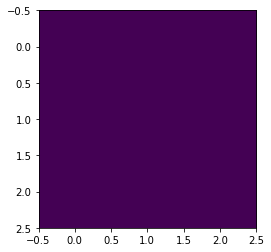

In [79]:
import matplotlib.pyplot as plt

M = [[0 for x in range(0, N)] for y in range(0, N)]
h = plt.imshow(M, interpolation="none")

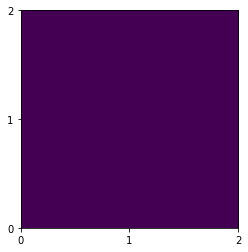

In [80]:
h = plt.imshow([[0 for x in range(0, N)] for y in range(0, N)], interpolation="none")

plt.axis([0, N-1, 0, N-1])
ax = h.axes
ax.set_xticks(range(0, N))
ax.set_yticks(range(0, N))

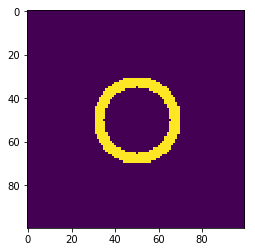

In [81]:
# now let's try to draw a ring:

import numpy as np
import matplotlib.pyplot as plt

# z = [[0 for x in range(0, 100)] for y in range(0,100)]

def myring(x,y):
    r = np.sqrt((x-50)**2+(y-50)**2)   # this is the distance w.r.t (50, 50)
    if  r<20 and r>15:
        return 1
    else:
        return 0

z = [ [myring(x,y) for x in range(0, 100)] for y in range(0, 100)]    
    
# equivalent code in list comprehension    
# z = [ [1 if np.sqrt((x-50)**2+(y-50)**2) <20 and np.sqrt((x-50)**2+(y-50)**2)>15 
#         else 0 for x in range(0, 100)] for y in range(0, 100)]

h = plt.imshow(z, interpolation="none")


---
# Modules


Modules let you collect all of your functions in a centralized location, so that you can apply the "rule of two" across multiple files.

*Make sure the module you're trying to import (i.e. `myModule.py`) is in the same folder as your notebook!*

You can import specific functions or variables into your namespace:

In [25]:
from myModule import f, pi

print(f(3))
print(pi)


18
3.141569


You can also choose to import *everything* in a module:

In [ ]:
# %load_ext autoreload
%autoreload

from myModule import *

Or you can import the whole module and the functions and variables are available as sub-parts

In [ ]:
def f():
    print("Still here!\n")
    
    
import myModule

print(myModule.f(3))
print(myModule.pi)

f()

In [28]:
import myModule as mod

print(mod.f(3))
print(mod.pi)
mod.pi



18
3.141569


3.141569

In [ ]:
import numpy as np   # import the numerical package
import matplotlib.pyplot as plt   # this a particular plotting module from the matplotlib package

# help(np)

z = np.array([1, 2, 40, 50, 61])

[0 if x%2==0 else x for x in z]


## documentation

You can use

    help()
    
or 
    ?
    
or, in Jupyter, *Shift* + *Tab* to get information about the module and its functions through the "doc string"s that you wrote. (Of course you wrote them! Long, clear, and detailed, right?)

In [31]:
?mod.f    # like pressing Shift + Tab*3
help(mod.f)
help(mod)

Help on function f in module myModule:

f(x, a=2, verbose=False)
    Hmm! An amazing function that will fulfill all of your example function needs
    
    Computes a*x^2
    
    Parameters
    ----------
    x: numeric
        Primary input which will be squared
    a: numeric, optional, default=2
        Multiplicative factor
    verbose: bool, optional, default=False
        If True, prints additional information about the computation
        
    RETURNS:
    --------
    
    a*x^2

Help on module myModule:

NAME
    myModule

DESCRIPTION
    This initial text is overall documentation
    for the module as a whole

FUNCTIONS
    f(x, a=2, verbose=False)
        Hmm! An amazing function that will fulfill all of your example function needs
        
        Computes a*x^2
        
        Parameters
        ----------
        x: numeric
            Primary input which will be squared
        a: numeric, optional, default=2
            Multiplicative factor
        verbose: bool, opt

In the Jupyter notebook, when the cursor is inside the function parentheses, press `Tab` to get a reminder of parameter names.

In [ ]:
mod.f(10, a=4)

## updating

After making changes to a module, you either need to restart the notebook or `reload` the module

The `%[command]` syntax is for *magic* commands, a feature of IPython. `%autoreload` is just one of many useful magic commands -- you can find a list and documentation on all IPython magic commands [here](http://ipython.readthedocs.io/en/stable/interactive/magics.html)

In [40]:
# We only need to do this one; the %autoreload magic command will then be available
%load_ext autoreload  
%autoreload 

import myModule as mod_2

mod_2.james


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'tall'

---
# Packages
big projects, sharing code

## packages

* collections of modules
* cross-language integration
* distribution

## distribution

From simplest to most complicated:
1. Anaconda: `conda install [package]`
2. PIP / PyPI: `pip install [package]`
3. GitHub / Git: `git clone [package]`

---
# Plotting

## matplotlib

Plotting in Python is done through the `pyplot` module in the `matplotlib` package. More on models and packages later. For know, just know that, to use this functionality, you'll need to run the following commands in any notebook that uses this for plotting. 

In [41]:
# this line is ALWAYS needed for plotting
from matplotlib import pyplot as plt


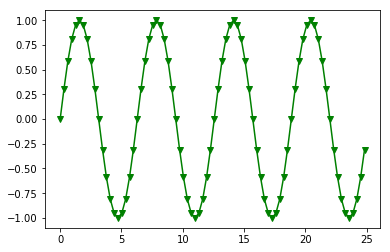

In [42]:
# The following line makes plots show up within the notebook
%matplotlib inline

# Now lets import the plotting module from the package matplotlib
from matplotlib import pyplot as plt

# And lets import the numerical package
import numpy as np

ncycles = 4
# produce a vector whose elements start at 0, go to 2*np.pi*ncycles in steps of pi/10
t = np.arange(0, 2*np.pi*ncycles, np.pi/10)
# print(t)

plt.plot(t, np.sin(t), 'gv-')
# plt.plot  takes a vector of x positions and a same-length vector of y positions,
# and plots dots in order: x[0],y[0]  then x[1],y[1]   then x[2],y[2]

In [43]:
t = np.array([0, 0.3, 0.6])
print(np.sin(t))

[ 0.          0.29552021  0.56464247]


Using matplotlib backend: MacOSX


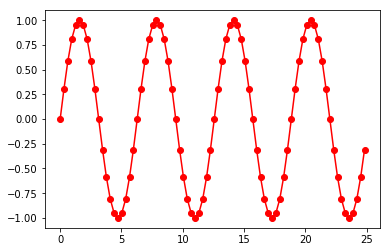

In [44]:
# The following alternative line uses the dafault "plotting back end" on your computer
# You might need to restart the kernel and clear outputs if you want to switch to this external plotting form
%matplotlib

# Now lets import the plotting module from the package matplotlib
from matplotlib import pyplot as plt

# And lets import the numerical package
import numpy as np

ncycles = 4
t = np.arange(0, 2*np.pi*ncycles, np.pi/10)
plt.plot(t, np.sin(t), 'ro-')


## Plotting single points

First let's plot a single point

`plt.plot(x, y, format_str)`
- `x`: x coordinate
- `y`: y coordinate
- `format_str`: formatting string

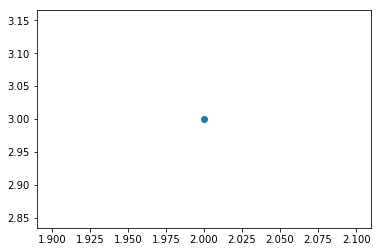

In [45]:
plt.plot(2, 3, 'o')

We can change the shape of the marker with the format string
*Note:* The semicolon at the end of the plotting command surpresses the output of the name of the plotting object (e.g. *[< matplotlib.lines.Line2D at 0x10fe4da58>]*, as seen above), but not the plot itself

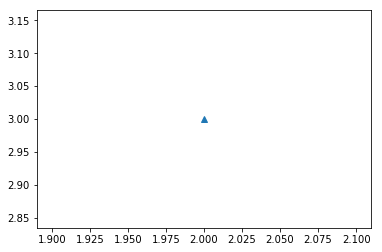

In [46]:
plt.plot(2, 3, '^');

We can also specify a color in the format string

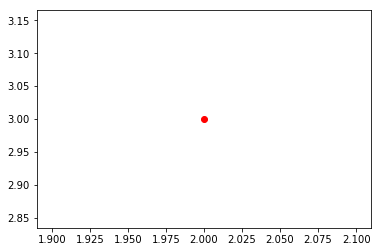

In [47]:
plt.plot(2, 3, 'or');

We can plot multiple points by plotting multiple times

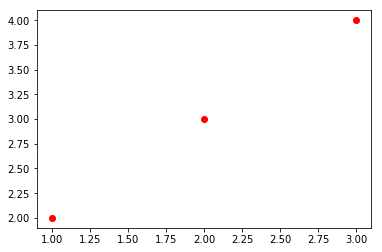

In [48]:
plt.plot(1, 2, 'ro');
plt.plot(2, 3, 'ro');
plt.plot(3, 4, 'ro');

As you can see, PyPlot doesn't always pick the best defualt values for the ranges of the x- and y-axes. We can set them by hand.

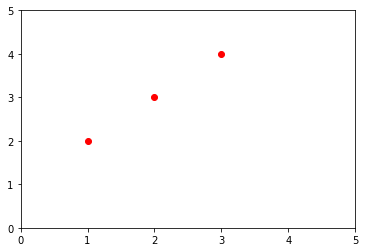

In [49]:
plt.plot(1, 2, 'ro');
plt.plot(2, 3, 'ro');
plt.plot(3, 4, 'ro');

plt.xlim([0, 5]);
plt.ylim([0, 5]);

## Plotting lines

To plot a line, make `x` and `y` into a `list` of coordinate values

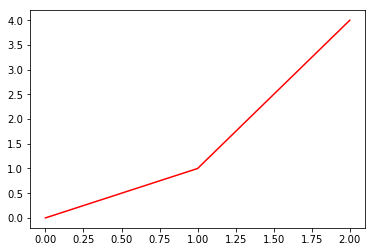

In [50]:
plt.plot([0, 1, 2], [0, 1, 4], 'r')

If we include marker shape in the format string, we can make our previous plot this way

(0, 5)

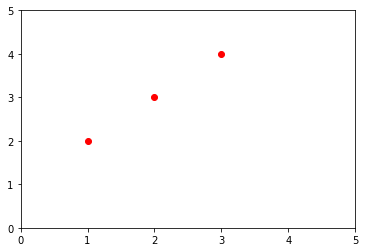

In [52]:
plt.plot([1, 2, 3], [2, 3, 4], 'ro')
plt.xlim([0, 5])
plt.ylim([0, 5])

We can also do both points and lines

(0, 5)

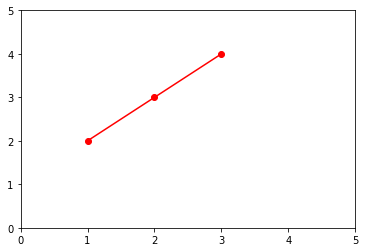

In [53]:
plt.plot([1, 2, 3], [2, 3, 4], 'ro-')
plt.xlim([0, 5])
plt.ylim([0, 5])

### plotting separate vertical lines

The length of h is  2


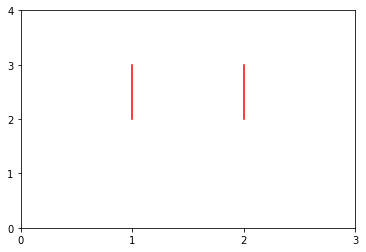

In [54]:
h = plt.plot([[1,2], [1,2]], [[2,2], [3,3]], 'r-')
# plot returns not axes (like imshow did) but a list of lines 

ax = h[0].axes
ax.set_xticks(range(0, 4))
ax.set_yticks(range(0, 5))

print("The length of h is ", len(h))

## Additional formatting

It's always important to label your axes!

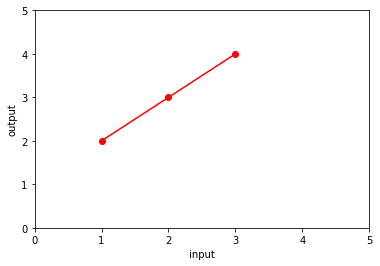

In [55]:
plt.plot([1, 2, 3], [2, 3, 4], 'ro-');
plt.xlim([0, 5]);
plt.ylim([0, 5]);

plt.xlabel('input');
plt.ylabel('output');

Nearly every aspect of these plots is editable -- titles, fonts, colors, tick marks, etc, etc. Google is your best friend for figuring out how to change these features.

## Multiple Plots

Let's make two different sets of data to play with.

In [56]:
x = range(6)

# y = 4*x
y1 = []
for val in x:
    y1 += [4*val]
    
# y = x**2
y2 = []
for val in x:
    y2 += [val**2]
    
print("x:", list(x))
print("y1:", y1)
print("y2:", y2)

x: [0, 1, 2, 3, 4, 5]
y1: [0, 4, 8, 12, 16, 20]
y2: [0, 1, 4, 9, 16, 25]


One way of comparing these two trends is to plot them on top of each other

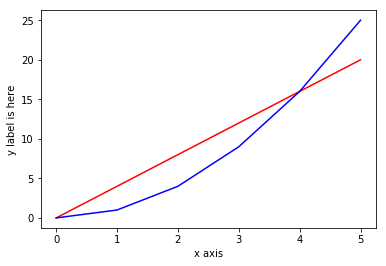

In [57]:
plt.plot(x, y1, 'r');
plt.plot(x, y2, 'b');
plt.xlabel('x axis')
plt.ylabel('y label is here')

Another approach is to use two subplots

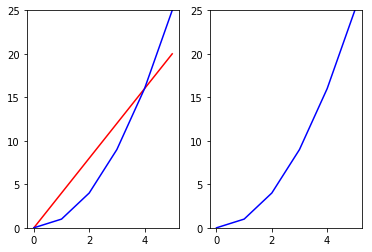

In [58]:
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
plt.plot(x, y1, 'r');
plt.plot(x, y2, 'b');
plt.ylim([0, 25]);

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
plt.plot(x, y2, 'b');
plt.ylim([0, 25]);

## Advanced Examples -- aka Eye Candy

Don't pay too much attention to the actual implementation quite yet, this is just to show you some examples of different types of plots!

Histograms

In [66]:
from pylab import *

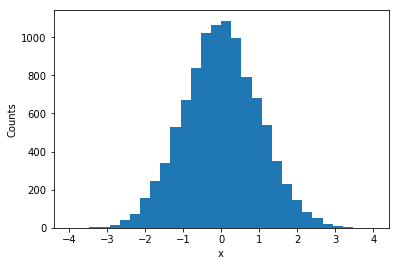

In [59]:
import numpy as np
import numpy.random
x = numpy.random.normal(size=10000)
plt.hist(x, bins=np.linspace(-4,4,31));
plt.xlabel('x');
plt.ylabel('Counts');

contour plots

(-1, 1)

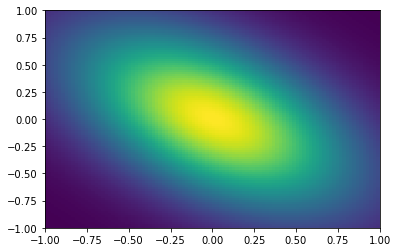

In [67]:
dx = 0.02
dy = 0.02
x = np.arange(-1,1+dx,dx)
y = np.arange(-1,1+dy,dy)
X, Y = np.meshgrid(x,y)

Z = np.exp((-X**2-Y**2-X*Y)/0.5)
Z = Z[:-1,:-1]
pcolor(X,Y,Z)
xlim(-1,1)
ylim(-1,1)

A heart in 3D

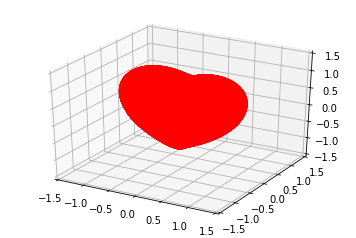

In [68]:
from mpl_toolkits.mplot3d import Axes3D

def heart_3d(x,y,z):
    return (x**2+(9/4)*y**2+z**2-1)**3-x**2*z**3-(9/80)*y**2*z**3
def plot_implicit(fn, bbox=(-1.5,1.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = figure()
    ax = fig.add_subplot(111, projection='3d')
    A = linspace(xmin, xmax, 100) # resolution of the contour
    B = linspace(xmin, xmax, 100) # number of slices
    A1,A2 = meshgrid(A,A) # grid on which the contour is plotted
    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z',colors=('r',))
        # [z] defines the only level to plot for this contour for this value of z
    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y',colors=('red',))
    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x',colors=('red',))
    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    show()

plot_implicit(heart_3d)
# credit: http://bytesizebio.net/2013/02/16/a-belated-valentines-day-post/